Datascience and Business Analytics
Task-2
Prediction using Decision Tree Algorithm
BY,
VIDYA TS

Import Necessary Liraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

Read csv file using pandas

In [2]:
dataset = pd.read_csv('Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dataset['Species'] = dataset['Species'].map({'Iris-virginica': 0,'Iris-versicolor':1,'Iris-setosa':2})

In [4]:
dataset.drop('Id',axis=1,inplace=True)

Splitting the dataset into training and testing 

In [5]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101) 

Standardization

In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

Decision Tree Algorithm

In [8]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini',max_features='auto',splitter='best')
model.fit(x_train,y_train)

DecisionTreeClassifier(max_features='auto')

Cross Validation

In [9]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=model, X=x_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 90.83 %
std is 6.92 %


Model Prediction on testing dataset

In [10]:
predictions = model.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Accuracy obtained on the test dataset

In [12]:
print(accuracy_score(predictions,y_test))

0.9666666666666667


Decision Tree Visualization

[Text(483.890625, 504.7714285714286, 'X[3] <= -0.603\ngini = 0.666\nsamples = 120\nvalue = [42, 38, 40]'),
 Text(431.578125, 427.11428571428576, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 40]'),
 Text(536.203125, 427.11428571428576, 'X[3] <= 0.673\ngini = 0.499\nsamples = 80\nvalue = [42, 38, 0]'),
 Text(340.03125, 349.4571428571429, 'X[3] <= 0.546\ngini = 0.139\nsamples = 40\nvalue = [3, 37, 0]'),
 Text(209.25, 271.8, 'X[1] <= -2.009\ngini = 0.1\nsamples = 38\nvalue = [2, 36, 0]'),
 Text(104.625, 194.14285714285717, 'X[2] <= 0.39\ngini = 0.444\nsamples = 3\nvalue = [1, 2, 0]'),
 Text(52.3125, 116.48571428571432, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(156.9375, 116.48571428571432, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(313.875, 194.14285714285717, 'X[2] <= 0.67\ngini = 0.056\nsamples = 35\nvalue = [1, 34, 0]'),
 Text(261.5625, 116.48571428571432, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(366.1875, 116.48571428571432, 'X[1] <= -0.788\ngini = 0.5\n

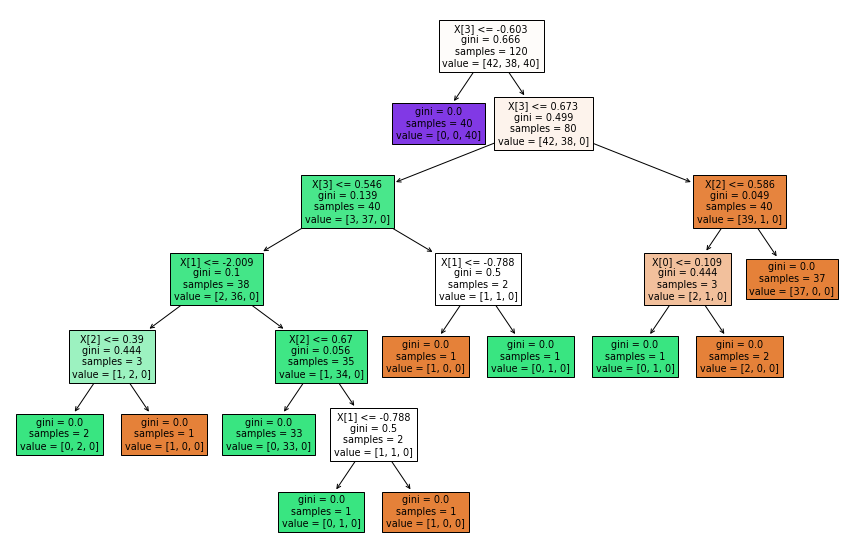

In [35]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)

In [36]:
print(tree.export_text(model))

|--- feature_3 <= -0.60
|   |--- class: 2
|--- feature_3 >  -0.60
|   |--- feature_3 <= 0.67
|   |   |--- feature_3 <= 0.55
|   |   |   |--- feature_1 <= -2.01
|   |   |   |   |--- feature_2 <= 0.39
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  0.39
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  -2.01
|   |   |   |   |--- feature_2 <= 0.67
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  0.67
|   |   |   |   |   |--- feature_1 <= -0.79
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  -0.79
|   |   |   |   |   |   |--- class: 0
|   |   |--- feature_3 >  0.55
|   |   |   |--- feature_1 <= -0.79
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  -0.79
|   |   |   |   |--- class: 1
|   |--- feature_3 >  0.67
|   |   |--- feature_2 <= 0.59
|   |   |   |--- feature_0 <= 0.11
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  0.11
|   |   |   |   |--- class: 0
|   |   |--- feature_2 >  0.59


Prediction On new datapoints

In [42]:
new_pre=model.predict([[4.5,7.5,8.5,6.5]])
if new_pre == [0]:
    print('Iris-virginica')
elif new_pre == [1]:
    print('Iris_versicolor')
else:
    print('Iris_setosa')

Iris-virginica
